In [243]:
import numpy as np
from PIL import Image, ImageOps
from scipy.fft import fft

In [244]:
img_pil = Image.open('wolves.png')        #to read image
img_pil.show()    

gray_image = ImageOps.grayscale(img_pil)
gray_image.show()

gray_img_pil_np = np.array(gray_image)


In [245]:
gray01 = gray_img_pil_np/255     #scaling 0 to 1

In [246]:
gray01

array([[0.01960784, 0.00392157, 0.03137255, ..., 0.07843137, 0.0745098 ,
        0.05490196],
       [0.00392157, 0.03921569, 0.01568627, ..., 0.07843137, 0.04705882,
        0.03137255],
       [0.01176471, 0.01960784, 0.01960784, ..., 0.01568627, 0.00784314,
        0.01960784],
       ...,
       [0.44705882, 0.44705882, 0.44705882, ..., 0.13333333, 0.1372549 ,
        0.14117647],
       [0.41176471, 0.41176471, 0.41176471, ..., 0.16470588, 0.17254902,
        0.17647059],
       [0.4       , 0.39607843, 0.39607843, ..., 0.14509804, 0.15294118,
        0.15686275]])

In [247]:
def fast_fourier_transform_2(image):
    fft1 = fft(image)
    fft2 = fft(fft1.transpose())
    return fft2

In [264]:
fft2 = fast_fourier_transform_2(gray01)

fft2

array([[309749.67058824    -0.j        ,  60326.78707175 +8892.0860457j ,
         13252.99223603  +835.69547857j, ...,
          2586.04093801   +60.04893394j,  13252.99223603  -835.69547857j,
         60326.78707175 -8892.0860457j ],
       [-43779.51276194-33084.28024326j, -34297.26811423 +5098.74981357j,
        -10709.34366563+12325.54708887j, ...,
          6939.15445997 -3688.71750027j,   2558.82244319-17235.68899421j,
        -25652.91959866 -8288.92632741j],
       [-14588.55000477 -2617.36022281j,   2150.59621758 -6131.18324615j,
         -1940.52317521-10258.89457304j, ...,
         -8783.20727698 +7432.63169743j,  -5917.53519994 +7589.78876452j,
         -2621.15199996 +8360.05100295j],
       ...,
       [ -9596.71564429 +4111.58177179j, -12472.40737652+11976.52637673j,
         -3475.17426067 +1242.61273513j, ...,
          7579.13434263 -4271.37384275j,   6195.79260488-12122.00326244j,
         -2542.93146855-22574.44775352j],
       [-14588.55000477 +2617.36022281j,  -2

In [265]:
magnitude = np.sqrt(np.real(fft2)**2+np.imag(fft2)**2)

s = np.log(1+abs(magnitude))


array([[12.64352296, 11.01829477,  9.4940381 , ...,  7.85853942,
         9.4940381 , 11.01829477],
       [10.91282302, 10.45377989,  9.70070839, ...,  8.96949834,
         9.76569544, 10.20210331],
       [ 9.60390045,  8.77931441,  9.25357338, ...,  9.3507135 ,
         9.17212316,  9.07821705],
       ...,
       [ 9.25353443,  9.75803177,  8.21382971, ...,  9.07117945,
         9.51889992, 10.03092263],
       [ 9.60390045,  9.07821705,  9.17212316, ...,  8.18603551,
         9.25357338,  8.77931441],
       [10.91282302, 10.20210331,  9.76569544, ...,  9.3202756 ,
         9.70070839, 10.45377989]])

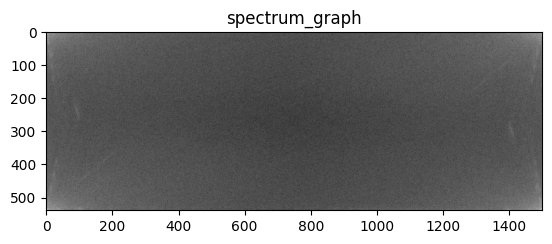

In [280]:
plt.imshow(s.transpose(), cmap = 'gray')
plt.title("spectrum_graph")
plt.show()

Text(0.5, 1.0, 'Shifted Spectrum')

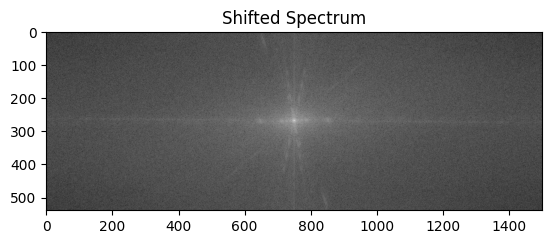

In [281]:
spectrum_shifted = np.fft.fftshift(magnitude)
spectrum_shifted = np.log(1+abs(spectrum_shifted))

plt.imshow(spectrum_shifted.transpose(), cmap = 'gray')
plt.title('Shifted Spectrum')

Text(0.5, 1.0, 'Phase angle')

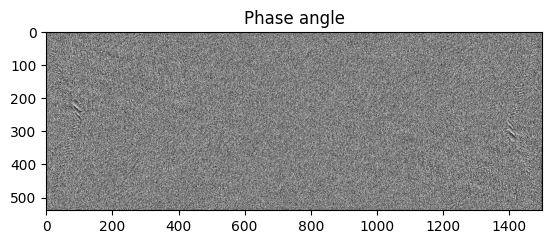

In [285]:
phase_angle = np.arctan2(np.imag(fft2),np.real(fft2))
plt.imshow(phase_angle.transpose(), cmap = 'gray')
plt.title('Phase angle')

Text(0.5, 1.0, 'Shifted Phase angle')

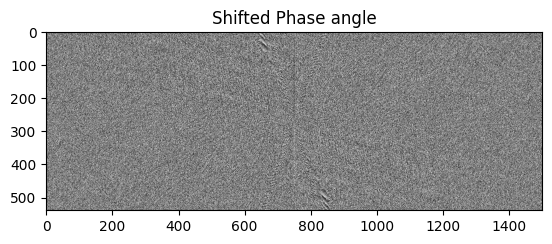

In [284]:
shifted_phase_angle = np.fft.fftshift(phase_angle)
plt.imshow(shifted_phase_angle.transpose(), cmap = 'gray')
plt.title('Shifted Phase angle')

In [270]:
#2b

# fft2_conjugate = np.conjugate(fft2)

fft2_conjugate = np.real(fft2) + np.imag(fft2)*complex('j')*(-1)

f1 = fast_fourier_transform_2(fft2_conjugate)

# fx = np.conjugate(fx)

idft2 = np.real(f1) + np.imag(f1)*complex('j')*(-1)

In [271]:
idft2 = idft2/(gray_img_pil_np.shape[0]*gray_img_pil_np.shape[1])

In [272]:
idft2_real = np.real(idft2)

In [273]:
idft2_real

array([[0.01960784, 0.00392157, 0.03137255, ..., 0.07843137, 0.0745098 ,
        0.05490196],
       [0.00392157, 0.03921569, 0.01568627, ..., 0.07843137, 0.04705882,
        0.03137255],
       [0.01176471, 0.01960784, 0.01960784, ..., 0.01568627, 0.00784314,
        0.01960784],
       ...,
       [0.44705882, 0.44705882, 0.44705882, ..., 0.13333333, 0.1372549 ,
        0.14117647],
       [0.41176471, 0.41176471, 0.41176471, ..., 0.16470588, 0.17254902,
        0.17647059],
       [0.4       , 0.39607843, 0.39607843, ..., 0.14509804, 0.15294118,
        0.15686275]])

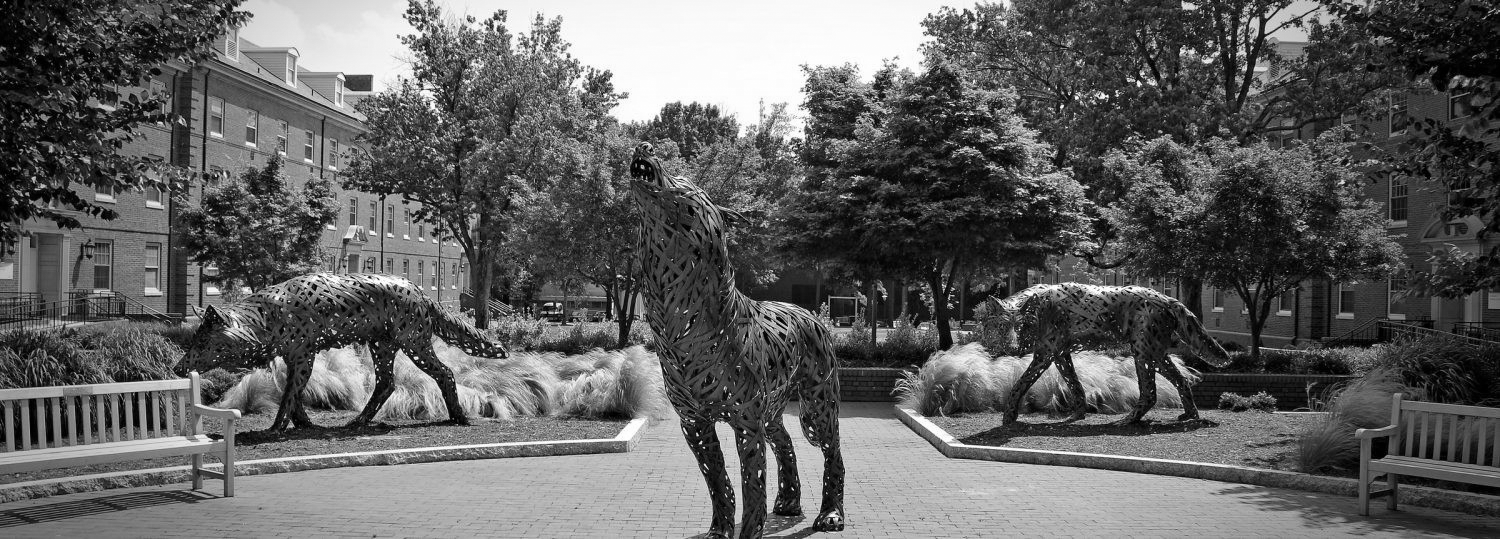

In [286]:
Image.fromarray((idft2_real*255).astype(np.uint8))

In [275]:
d = gray_img_pil_np - (idft2_real*255).astype(np.uint8)

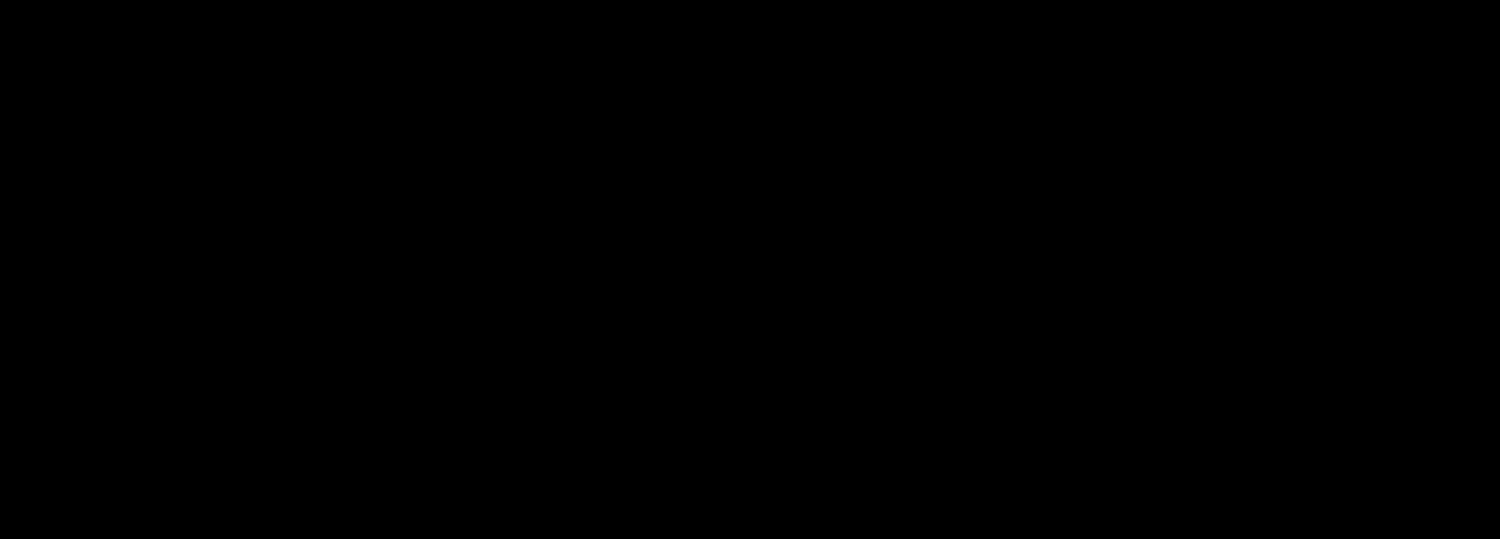

In [276]:
Image.fromarray(d.astype(np.uint8))

In [277]:
d

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 1]], dtype=uint8)